# CVPR Project - Part II: Multi Templates Matching with SIFT: Part 2

## Multi Model Fitting images

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [2]:
from utils import *

### Implementation

## Gianduja

In [4]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

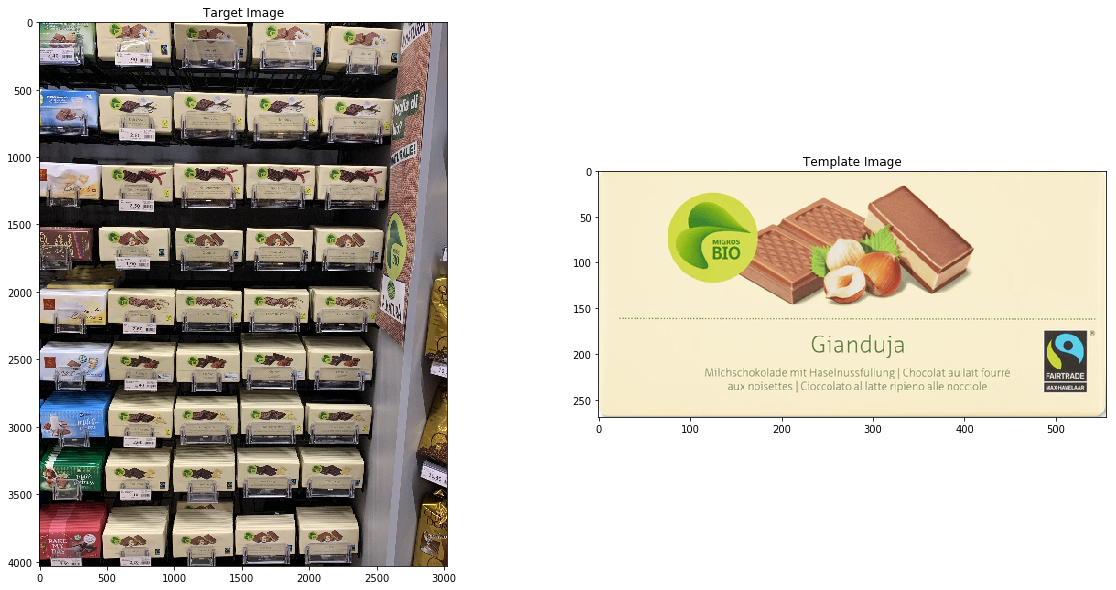

In [4]:
plot_images(img_target, img_template3)

In [5]:
keypoints_target, descriptors_target, keypoints_template3, descriptors_template3 = sift_keypoints_and_descriptors(img_target, img_template3)

In [6]:
plot_best_matches3, best_matches3 = get_best_matches(descriptors_target, descriptors_template3, ratio=0.45)

In [7]:
correspondences3 = get_correspondences(best_matches3, keypoints_target, keypoints_template3)

In [11]:
models3 = sequential_msac(correspondences3, 15, 4,99,5000, 3)

304
285
265
248
231
218
206
195
185
174
165
156
148
139
132
125
117
111
105
99
94
89
84
79
74
70
66
62
57
52
48
44
40
36
32
28
24
20
16
12
8
4


In [15]:
PS3 = get_preference_sets(correspondences3, models3)

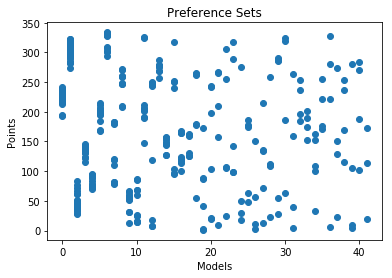

In [16]:
plot_scatter(PS3)

In [17]:
cl3 = j_linkage(PS3)

/Users/reinardlazuardikuwandy/Documents/USI/Semester 4/CVPR/Project/utils.py:339: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.double(np.bitwise_and(point_1, point_2).sum()) / get_union(point_1, point_2).sum())


In [8]:
mod3 = remove_pref_set(cl3)

In [9]:
mod3 = get_model(cl3,correspondences3)

In [10]:
new_mod3 = delete_small_model(mod3, 4)

In [11]:
clusters_3, clusters_size_list3 = define_clusters(new_mod3)
clusters_size3 = len(clusters_3)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list3, clusters_3)))

new_test_model3 = remove_far_distances_clusters(clusters_3, new_mod3)

print("Num of clusters previously: {}".format(len(new_mod3)))

clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)
clusters_new3, a_model = merge_cluster(clusters_new3, new_test_model3)
clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)

print("Num of clusters currently: {}".format(len(new_test_model3)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new3, clusters_new3)))

Previous dunn index of the cluster : 0.0013188051210836626
Num of clusters previously: 29
Num of clusters currently: 10
Current dunn index of the cluster : 0.013805402686356275


In [12]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

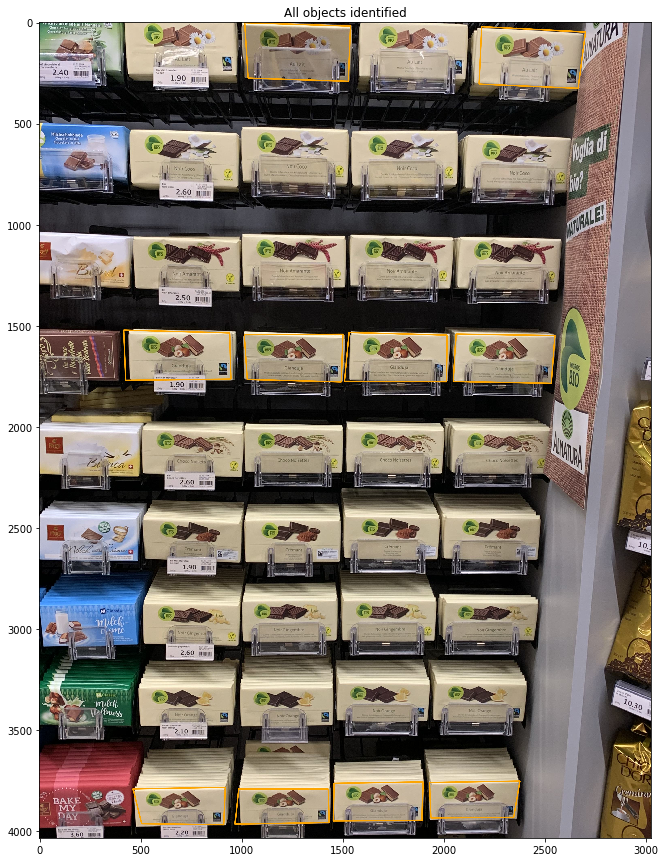

In [13]:
draw_bounding_boxes(img_target, img_template3, a_model, 1, True, color=(3, 165, 252))

### Test 2

In [4]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

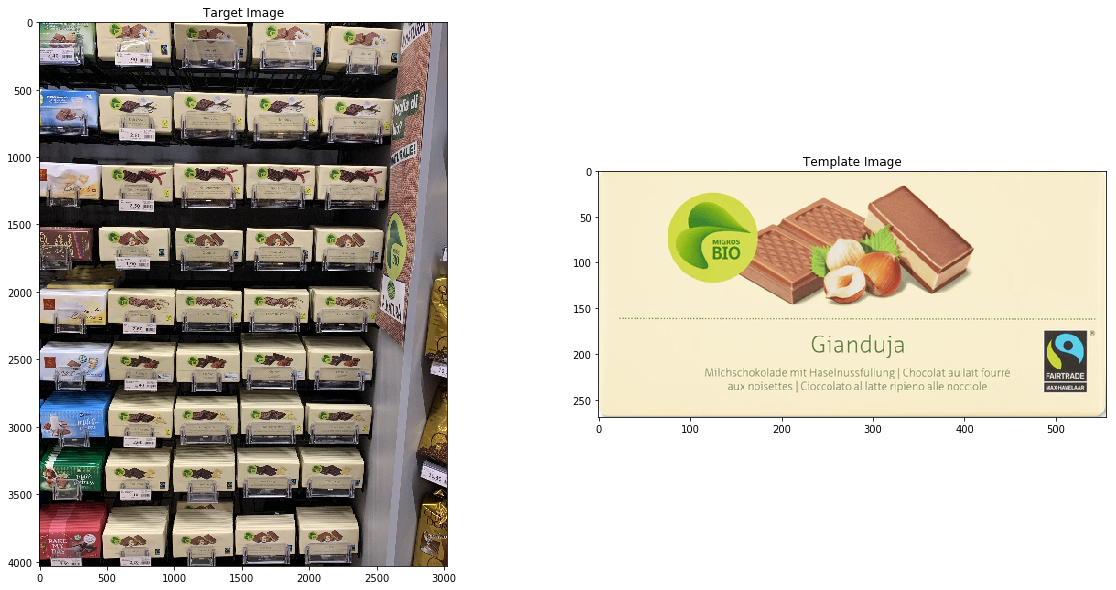

In [78]:
plot_images(img_target, img_template3)

In [79]:
keypoints_target, descriptors_target, keypoints_template3, descriptors_template3 = sift_keypoints_and_descriptors(img_target, img_template3)

In [80]:
plot_best_matches3, best_matches3 = get_best_matches(descriptors_target, descriptors_template3, ratio=0.45)

In [81]:
correspondences3 = get_correspondences(best_matches3, keypoints_target, keypoints_template3)

In [82]:
models3 = sequential_msac(correspondences3, 15, 4,99,5000, 5)

312
287
272
248
235
216
205
194
183
173
162
151
143
135
128
121
114
108
102
96
91
85
79
75
71
66
61
56
51
46
41
36
31
27
23
19
15
11
7
3


In [86]:
PS3 = get_preference_sets(correspondences3, models3)

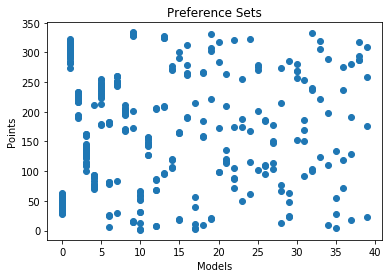

In [87]:
plot_scatter(PS3)

In [88]:
cl3 = j_linkage(PS3)

In [15]:
mod3 = remove_pref_set(cl3)

In [16]:
mod3 = get_model(cl3,correspondences3)

In [17]:
new_mod3 = delete_small_model(mod3, 4)

In [18]:
clusters_3, clusters_size_list3 = define_clusters(new_mod3)
clusters_size3 = len(clusters_3)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list3, clusters_3)))

new_test_model3 = remove_far_distances_clusters(clusters_3, new_mod3,100)

print("Num of clusters previously: {}".format(len(new_mod3)))

clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)
clusters_new3, new_test_model3 = merge_cluster(clusters_new3, new_test_model3)
clusters_new3, clusters_size_list_new3 = define_clusters(new_test_model3)

print("Num of clusters currently: {}".format(len(new_test_model3)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new3, clusters_new3)))

Previous dunn index of the cluster : 0.0012631900528802973
Num of clusters previously: 31
Num of clusters currently: 7
Current dunn index of the cluster : 0.028595438603190512


In [19]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

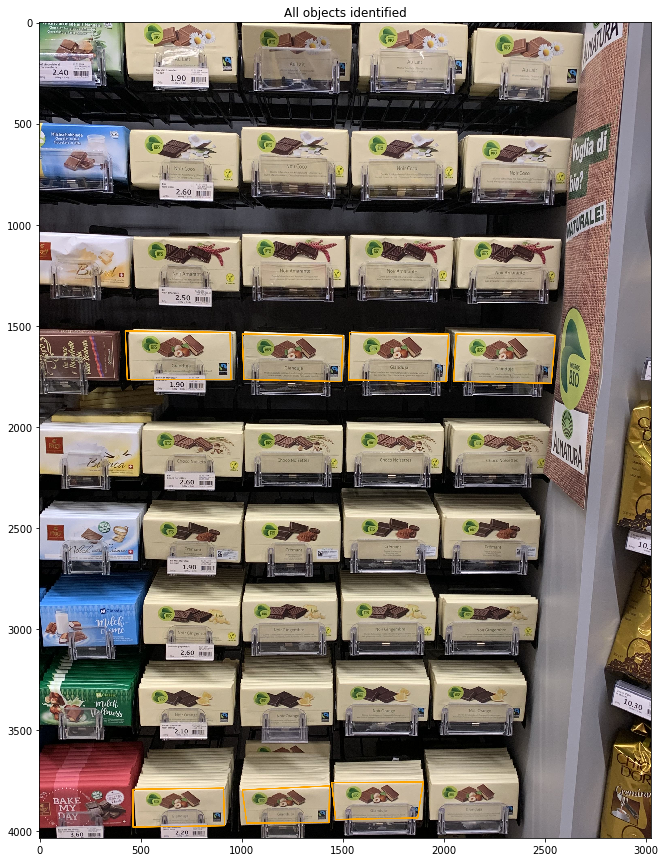

In [20]:
draw_bounding_boxes(img_target, img_template3, new_test_model3, 1, True, color=(3, 165, 252))

### Increase the ratio

In [6]:
img_target, img_template3 = read_images(IMG_TARGET, IMG_TEMPLATE[3])

In [7]:
keypoints_target, descriptors_target, keypoints_template3, descriptors_template3 = sift_keypoints_and_descriptors(img_target, img_template3)

In [8]:
plot_best_matches3, best_matches3 = get_best_matches(descriptors_target, descriptors_template3, ratio=0.6)

In [10]:
correspondences3 = get_correspondences(best_matches3, keypoints_target, keypoints_template3)

In [11]:
len(correspondences3)

934

As it is computationally expensive and takes a long time, unfortunately, we haven't finished running this process.